In [217]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine


In [218]:
import pandas as pd

## Create Dictionary for Compression Algorithm

In [292]:
lyric= 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa'

In [271]:
dict_size=256
{chr(i): i for i in range(dict_size)}

{'\x00': 0,
 '\x01': 1,
 '\x02': 2,
 '\x03': 3,
 '\x04': 4,
 '\x05': 5,
 '\x06': 6,
 '\x07': 7,
 '\x08': 8,
 '\t': 9,
 '\n': 10,
 '\x0b': 11,
 '\x0c': 12,
 '\r': 13,
 '\x0e': 14,
 '\x0f': 15,
 '\x10': 16,
 '\x11': 17,
 '\x12': 18,
 '\x13': 19,
 '\x14': 20,
 '\x15': 21,
 '\x16': 22,
 '\x17': 23,
 '\x18': 24,
 '\x19': 25,
 '\x1a': 26,
 '\x1b': 27,
 '\x1c': 28,
 '\x1d': 29,
 '\x1e': 30,
 '\x1f': 31,
 ' ': 32,
 '!': 33,
 '"': 34,
 '#': 35,
 '$': 36,
 '%': 37,
 '&': 38,
 "'": 39,
 '(': 40,
 ')': 41,
 '*': 42,
 '+': 43,
 ',': 44,
 '-': 45,
 '.': 46,
 '/': 47,
 '0': 48,
 '1': 49,
 '2': 50,
 '3': 51,
 '4': 52,
 '5': 53,
 '6': 54,
 '7': 55,
 '8': 56,
 '9': 57,
 ':': 58,
 ';': 59,
 '<': 60,
 '=': 61,
 '>': 62,
 '?': 63,
 '@': 64,
 'A': 65,
 'B': 66,
 'C': 67,
 'D': 68,
 'E': 69,
 'F': 70,
 'G': 71,
 'H': 72,
 'I': 73,
 'J': 74,
 'K': 75,
 'L': 76,
 'M': 77,
 'N': 78,
 'O': 79,
 'P': 80,
 'Q': 81,
 'R': 82,
 'S': 83,
 'T': 84,
 'U': 85,
 'V': 86,
 'W': 87,
 'X': 88,
 'Y': 89,
 'Z': 90,
 '[': 91,


## Create compression Algorithm

In [293]:

#implement a Lempel-Ziv Welch Algorithm to identify the reoccuring patterns of a string
#the more patterns within a lyric, the more it will be compressed
def compress(uncompressed):
    """finds patterns within string and compresses the string to a list of integer symbols."""
 
    # Build the dictionary.
    #codes from 0 to 255 represent 1-character sequences consisting of the corresponding 8-bit character, 
    dict_size = 256
    #dictionary of char Unicode code points  
    dictionary = {chr(i): i for i in range(dict_size)}
 
    #start with an empty string
    word = ""
    result = []
    #for every character in the string
    for char in uncompressed:
        try:
        
            #append the character to the empty string
            word_char = word + char
            #check to see if the characters are in the dictionary
            if word_char in dictionary:
                word = word_char
            #if we have not seen this pattern before, add it to the dictionary
            else:
                result.append(dictionary[word])
                # Add wc to the dictionary.
                dictionary[word_char] = dict_size
                dict_size += 1
                word = char
        except KeyError:
                result.append(0)
    # Output the code for w.
    if word:
        result.append(dictionary[word])
#         try:
#             result.append(dictionary[word])
#         except KeyError:
#             result.append(0)
    return result
 
  
# How to use:
compressed = compress(lyric)
print (compressed)

[97, 256, 257, 258, 259, 260, 261, 262, 263, 256]


In [294]:
#how many symbols are used to represent the compressed file
compressed=(len(compressed))

In [295]:
compressed

10

In [296]:
#how many symbols are used to represent the original file
original_size=len(lyric)

In [297]:
original_size

47

In [298]:
#the compression score is the percent of compressed size compared to the original file
compressed_score= ((original_size-compressed)/(original_size))

In [299]:
#the higher the compression score, the more repetative the lyrics

In [300]:
compressed_score

0.7872340425531915

## Connect to lyricDatabase

In [220]:
df = pd.read_sql_table("sample_metadata","sqlite:///Resources/lyricsupdated.sqlite")

In [ ]:
## parse through each song's lyrics and attribute a compression score

In [281]:
compression_list=[]

In [233]:
df.iloc[15][7]

"Every breath you take Every move you make Every bond you break Every step you take I'll be watching you Every single day Every word you say Every game you play Every night you stay I'll be watching you Oh can't you see You belong to me? How my poor heart aches with every step you take Every move you make Every vow you break Every smile you fake Every claim you stake I'll be watching you Since you've gone I've been lost without a trace I dream at night I can only see your face I look around but it's you I can't replace I feel so cold and I long for your embrace I keep crying baby baby please Oh can't you see You belong to me? How my poor heart aches with every step you take Every move you make Every vow you break Every smile you fake Every claim you stake I'll be watching you Every move you make Every step you take I'll be watching you I'll be watching you Every breath you take Every move you make Every bond you break Every step you take I'll be watching you Every single day Every word

In [230]:
len(compress(df.iloc[0][7]))

486

In [228]:
len(df.iloc[0][7])

1137

In [319]:
def compressScorer(lyric):
    lyric = lyric.encode()
    lyric = str(lyric).lower().replace("\\", "")
    
    
    _cscore = compress(lyric)
    
    return len(_cscore)

In [320]:
df.iloc[14]["Lyrics"]

"Come on Does she walk? Does she talk? Does she come complete? My homeroom homeroom angel Always pulled me from my seat She was pure like snowflakes No one could ever stain The memory of my angel Could never cause me pain Years go by I'm lookin' through a girly magazine And there's my homeroom angel on the pages in between My blood runs cold My memory has just been sold My angel is the centerfold Angel is the centerfold My blood runs cold wooh My memory has just been sold Angel is the centerfold Slipped me notes under the desk While I was thinkin' about her dress I was shy I turned away Before she caught my eye I was shakin' in my shoes Whenever she flashed those baby blues Something had a hold on me When angel passed close by Those soft fuzzy sweaters Too magical to touch To see her in that neglig�e Is really just too much My blood runs cold Yeah my memory has just been sold My angel is the centerfold Angel is the centerfold My blood runs cold My memory has just been sold oh yeah Ange

In [321]:
compressScorer(df.iloc[14]["Lyrics"])

801

In [323]:
df["compress_len"] = df.apply(lambda row: compressScorer(row.Lyrics), axis=1)

In [325]:
df["original_len"] = df.apply(lambda row: len(row.Lyrics), axis=1)

In [327]:
df["compress_score"] = (df.original_len - df.compress_len) / df.original_len

In [328]:
df.head()

,sample,Artist,Song,Genre,Year,Decade,Era,Lyrics,compress_len,original_len,compress_score
0,1,Blondie,Call Me,Rock,1980,1980's,Early 80's,Colour me your colour baby Colour me your car ...,461,1137,0.594547
1,2,Pink Floyd,Another Brick In The Wall,Rock,1980,1980's,Early 80's,We don't need no education We don't need no th...,399,898,0.555679
2,3,Olivia Newton-John,Magic,Rock,1980,1980's,Early 80's,Come take my hand You should know me I've alwa...,439,889,0.506187
3,4,Michael Jackson,Rock With You,R&B,1980,1980's,Early 80's,Girl close your eyes Let that rhythm get into ...,481,1044,0.539272
4,5,Bette Midler,The Rose,Pop,1980,1980's,Early 80's,Some say Love It is a river That drowns the te...,370,700,0.471429


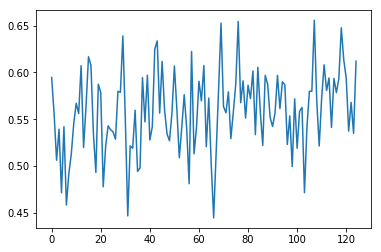

In [331]:
import matplotlib.pyplot as plt

df.compress_score.plot()

plt.show()

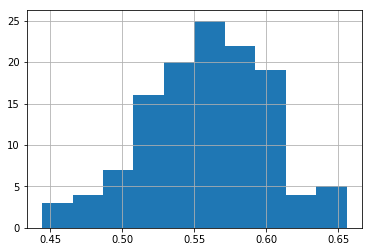

In [332]:
df.compress_score.hist()

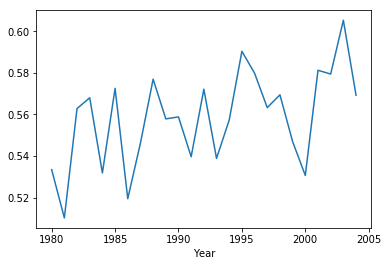

In [335]:
df.groupby("Year").mean()["compress_score"].plot()

In [282]:
x=0
for lyrics in df['Lyrics']:
    print(x)
    compressed=compress(lyrics)
    #how many symbols are used to represent the compressed file
    compressed=(len(compressed))
    #print(compressed)
    #how many symbols are used to represent the original file
    original_size=len(lyrics)
    #print(original_size)
    #the compression score is the percent of compressed size compared to the original file
    compressed_score= ((original_size-compressed)/(original_size))
    print(compressed_score)
    compression_list.append(compressed_score)
    x= x+1

0
0.5725593667546174
1
0.5278396436525612
2
0.48931383577052867
3
0.5258620689655172
4
0.4542857142857143
5
0.5191956124314442
6
0.4411302982731554
7
0.47496947496947495
8
0.5018587360594795
9
0.5350746268656716
10
0.5644891122278057
11
0.5425616547334925
12
0.594577553593947
13
0.5074257425742574
14


KeyError: '�'

In [267]:
compression_list

[0.5725593667546174,
 0.5278396436525612,
 0.48931383577052867,
 0.5258620689655172,
 0.4542857142857143,
 0.5191956124314442,
 0.4411302982731554,
 0.47496947496947495,
 0.5018587360594795,
 0.5350746268656716,
 0.5644891122278057,
 0.5425616547334925,
 0.594577553593947,
 0.5074257425742574,
 0.19052803483941208,
 0.6130909090909091,
 0.5925766076823479,
 0.5188356164383562,
 0.4732423924449108,
 0.5744985673352435,
 0.5646706586826348,
 0.46674057649667405,
 0.5010121457489879,
 0.5278969957081545,
 0.5247933884297521,
 0.5311453449430676,
 0.5113043478260869,
 0.5682656826568265,
 0.5704419889502762,
 0.6250666666666667,
 0.5402397260273972,
 0.43291839557399725,
 0.5081029551954243,
 0.5107260726072608,
 0.5398579321231255,
 0.4699612403100775,
 0.4841571609632446,
 0.5809108527131783,
 0.5270972531551597,
 0.5775907417148869,
 0.10102489019033675,
 0.5293586269196026,
 0.6184767277856136,
 0.6254763200870985,
 0.5429951690821256,
 0.6063321385902031,
 0.5468986384266263,
 0.51141

In [ ]:
pd.to_sql